In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [69]:
# Charger les différents ensembles de données

train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

oil_data = pd.read_csv('oil.csv')

stores_data = pd.read_csv('stores.csv')

transactions_data = pd.read_csv('transactions.csv')

holidays_data = pd.read_csv('holidays_events.csv')

In [70]:
# Afficher les premières lignes de chaque ensemble de données et le nombre de valeurs manquantes
print("Train Data:")
print(train_data.head())
print("\nNombre de valeurs manquantes dans le Train Data:")
print(train_data.isnull().sum())

print("\nTest Data:")
print(test_data.head())
print("\nNombre de valeurs manquantes dans le Test Data:")
print(test_data.isnull().sum())

print("\nOil Data:")
print(oil_data.head())
print("\nNombre de valeurs manquantes dans l'Oil Data:")
print(oil_data.isnull().sum())

print("\nStores Data:")
print(stores_data.head())
print("\nNombre de valeurs manquantes dans le Stores Data:")
print(stores_data.isnull().sum())

print("\nTransactions Data:")
print(transactions_data.head())
print("\nNombre de valeurs manquantes dans le Transactions Data:")
print(transactions_data.isnull().sum())

print("\nHolidays Data:")
print(holidays_data.head())
print("\nNombre de valeurs manquantes dans le Holidays Data:")
print(holidays_data.isnull().sum())

Train Data:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Nombre de valeurs manquantes dans le Train Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Test Data:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Nombre de valeurs manquantes dans le Test Data:
id             0
date           0
store_nb

In [71]:
oil_data['date'] = pd.to_datetime(oil_data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
# Convertir la colonne 'date' de test_data en datetime64[ns]
train_data = train_data.merge(oil_data, on='date', how='left')
test_data = test_data.merge(oil_data, on='date', how='left')

In [72]:
# Convertir la colonne 'date' de transactions_data en datetime64[ns]
transactions_data['date'] = pd.to_datetime(transactions_data['date'])

# Fusionner les DataFrames sur les colonnes 'date' et 'store_nbr'
train_data = train_data.merge(transactions_data, on=['date', 'store_nbr'], how='left')
test_data = test_data.merge(transactions_data, on=['date', 'store_nbr'], how='left')

In [73]:
train_data = train_data.merge(stores_data, on='store_nbr', how='left')
test_data = test_data.merge(stores_data, on='store_nbr', how='left')

In [74]:
# Delete transferred holidays
holidays_data = holidays_data.loc[~holidays_data['transferred']]

In [75]:
# Convertir la colonne 'date' de holidays_data en datetime64[ns]
holidays_data['date'] = pd.to_datetime(holidays_data['date'])

# Fusionner les DataFrames sur la colonne 'date'
train_data = train_data.merge(holidays_data, on='date', how='left')
test_data = test_data.merge(holidays_data, on='date', how='left')

In [76]:
# Ajouter les colonnes de jours fériés
train_data['holiday_national'] = (train_data['locale'] == 'National').astype(int)
train_data['holiday_regional'] = ((train_data['locale'] == 'Regional') & (train_data['locale_name'] == train_data['state'])).astype(int)
train_data['holiday_local'] = ((train_data['locale'] == 'Local') & (train_data['locale_name'] == train_data['city'])).astype(int)

# Ajouter les colonnes de jours fériés pour test_data
test_data['holiday_national'] = (test_data['locale'] == 'National').astype(int)
test_data['holiday_regional'] = ((test_data['locale'] == 'Regional') & (test_data['locale_name'] == test_data['state'])).astype(int)
test_data['holiday_local'] = ((test_data['locale'] == 'Local') & (test_data['locale_name'] == test_data['city'])).astype(int)

In [77]:
train_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,holiday_national,holiday_regional,holiday_local
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,1,0,0
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,1,0,0
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,1,0,0
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,0,0,0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,0,0,0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,0,0,0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,2155.0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,0,0,0


In [78]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['city', 'state', 'type_y', 'locale', 'locale_name', 'description', 'transferred', 'id', 'transactions']

# Supprimer les colonnes
train_data = train_data.drop(columns=colonnes_a_supprimer)
test_data = test_data.drop(columns=colonnes_a_supprimer)

In [79]:
train_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,cluster,holiday_national,holiday_regional,holiday_local
0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,D,13,1,0,0
1,2013-01-01,1,BABY CARE,0.000,0,NaN,D,13,1,0,0
2,2013-01-01,1,BEAUTY,0.000,0,NaN,D,13,1,0,0
3,2013-01-01,1,BEVERAGES,0.000,0,NaN,D,13,1,0,0
4,2013-01-01,1,BOOKS,0.000,0,NaN,D,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,B,6,0,0,0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,B,6,0,0,0
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,B,6,0,0,0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,B,6,0,0,0


In [80]:
# Assurez-vous que la colonne 'date' est au format datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Créez une plage de dates continue couvrant la période de votre ensemble de données
date_range = pd.date_range(start=train_data['date'].min(), end=train_data['date'].max())

# Trouvez les dates manquantes en comparant avec la plage de dates réelles
missing_dates = date_range[~date_range.isin(train_data['date'])]

# Affichez les dates manquantes, s'il y en a
if not missing_dates.empty:
    print("Dates manquantes dans la série temporelle :")
    print(missing_dates)
else:
    print("Aucune date manquante dans la série temporelle.")

Dates manquantes dans la série temporelle :
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [81]:
# Assurez-vous que la colonne 'date' est au format datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Créez une plage de dates continue couvrant la période de votre ensemble de données
date_range = pd.date_range(start=train_data['date'].min(), end=train_data['date'].max())

# Trouvez les dates manquantes en comparant avec la plage de dates réelles
missing_dates = date_range[~date_range.isin(train_data['date'])]

# Affichez les dates manquantes, s'il y en a
if not missing_dates.empty:
    print("Dates manquantes dans la série temporelle :")
    print(missing_dates)
else:
    print("Aucune date manquante dans la série temporelle.")

Dates manquantes dans la série temporelle :
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [82]:
# Dates de Noël manquantes
dates_noel_manquantes = pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'])

# Vérifier et afficher les lignes correspondantes dans holidays_data
for date in dates_noel_manquantes:
    matching_rows = holidays_data[holidays_data['date'] == date]
    if not matching_rows.empty:
        print(f"Lignes correspondantes dans holidays_data pour la date {date}:\n{matching_rows}")

# Vérifier et afficher les lignes correspondantes dans oil_data
for date in dates_noel_manquantes:
    matching_rows = oil_data[oil_data['date'] == date]
    if not matching_rows.empty:
        print(f"Lignes correspondantes dans oil_data pour la date {date}:\n{matching_rows}")

# Vérifier et afficher les lignes correspondantes dans transactions_data
for date in dates_noel_manquantes:
    matching_rows = transactions_data[transactions_data['date'] == date]
    if not matching_rows.empty:
        print(f"Lignes correspondantes dans transactions_data pour la date {date}:\n{matching_rows}")

Lignes correspondantes dans holidays_data pour la date 2013-12-25 00:00:00:
         date     type    locale locale_name description  transferred
89 2013-12-25  Holiday  National     Ecuador     Navidad        False
Lignes correspondantes dans holidays_data pour la date 2014-12-25 00:00:00:
          date     type    locale locale_name description  transferred
155 2014-12-25  Holiday  National     Ecuador     Navidad        False
Lignes correspondantes dans holidays_data pour la date 2015-12-25 00:00:00:
          date     type    locale locale_name description  transferred
208 2015-12-25  Holiday  National     Ecuador     Navidad        False
Lignes correspondantes dans holidays_data pour la date 2016-12-25 00:00:00:
          date     type    locale locale_name description  transferred
294 2016-12-25  Holiday  National     Ecuador     Navidad        False
Lignes correspondantes dans oil_data pour la date 2013-12-25 00:00:00:
          date  dcoilwtico
256 2013-12-25         NaN
Ligne

In [83]:

# Dates de Noël manquantes
dates_noel_manquantes = pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'])

# Créer un DataFrame pour les nouvelles lignes
new_rows = []
for date in dates_noel_manquantes:
    if date not in train_data['date'].values:
        new_row = {
            'date': date,
            'store_nbr': 1, 
            'family': 'AUTOMOTIVE', 
            'sales': train_data['sales'].mean(),  # Utilisation de la moyenne pour 'sales'
            'onpromotion': 0,
            'dcoilwtico': float('nan'),
            'type_x': 'D',
            'cluster': train_data['cluster'].mean(),  # Utilisation de la moyenne pour 'cluster'
            'holiday_national': 1,
            'holiday_regional': 0,
            'holiday_local': 0
        }
        new_rows.append(new_row)

In [84]:
train_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,cluster,holiday_national,holiday_regional,holiday_local
0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,D,13,1,0,0
1,2013-01-01,1,BABY CARE,0.000,0,NaN,D,13,1,0,0
2,2013-01-01,1,BEAUTY,0.000,0,NaN,D,13,1,0,0
3,2013-01-01,1,BEVERAGES,0.000,0,NaN,D,13,1,0,0
4,2013-01-01,1,BOOKS,0.000,0,NaN,D,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,B,6,0,0,0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,B,6,0,0,0
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,B,6,0,0,0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,B,6,0,0,0


In [85]:
# Imputation par la moyenne
train_data['dcoilwtico'].fillna(train_data['dcoilwtico'].mean(), inplace=True)

# Calculer le pourcentage des valeurs manquantes pour chaque colonne
missing_percentage = (train_data.isnull().mean() * 100).round(2)

# Afficher le pourcentage des valeurs manquantes
print(missing_percentage)

date                0.0
store_nbr           0.0
family              0.0
sales               0.0
onpromotion         0.0
dcoilwtico          0.0
type_x              0.0
cluster             0.0
holiday_national    0.0
holiday_regional    0.0
holiday_local       0.0
dtype: float64


In [86]:
# Imputation par la moyenne
test_data['dcoilwtico'].fillna(test_data['dcoilwtico'].mean(), inplace=True)

# Calculer le pourcentage des valeurs manquantes pour chaque colonne
missing_percentage = (test_data.isnull().mean() * 100).round(2)

# Afficher le pourcentage des valeurs manquantes
print(missing_percentage)

date                0.0
store_nbr           0.0
family              0.0
onpromotion         0.0
dcoilwtico          0.0
type_x              0.0
cluster             0.0
holiday_national    0.0
holiday_regional    0.0
holiday_local       0.0
dtype: float64


In [87]:
# Afficher les différentes valeurs uniques dans la colonne 'family'
unique_families = train_data['family'].unique()

# Afficher le résultat
print(unique_families)

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [88]:
# Convertir la colonne 'date' en format datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Grouper par date et store_nbr, calculer la moyenne des ventes pour chaque jour et chaque magasin
average_sales_per_day_store = train_data.groupby(['date', 'family'])['sales'].mean().reset_index()

# Supprimer les lignes dupliquées dans le DataFrame d'origine
train_data_unique = train_data.drop_duplicates(subset=['date', 'family'])

# Fusionner le DataFrame avec la moyenne des ventes pour chaque jour et chaque magasin
train_data_unique = pd.merge(train_data_unique, average_sales_per_day_store, on=['date', 'family'], suffixes=('_original', '_average'))

# Afficher le résultat
print(train_data_unique)

            date  store_nbr                      family  sales_original  \
0     2013-01-01          1                  AUTOMOTIVE        0.000000   
1     2013-01-01          1                   BABY CARE        0.000000   
2     2013-01-01          1                      BEAUTY        0.000000   
3     2013-01-01          1                   BEVERAGES        0.000000   
4     2013-01-01          1                       BOOKS        0.000000   
...          ...        ...                         ...             ...   
55567 2017-08-15          1                     POULTRY      234.892000   
55568 2017-08-15          1              PREPARED FOODS       42.822998   
55569 2017-08-15          1                     PRODUCE     2240.230000   
55570 2017-08-15          1  SCHOOL AND OFFICE SUPPLIES        0.000000   
55571 2017-08-15          1                     SEAFOOD       22.487000   

       onpromotion  dcoilwtico type_x  cluster  holiday_national  \
0                0   68.015874 

In [90]:
# Afficher les différentes valeurs uniques dans la colonne 'family'
unique_store = train_data['store_nbr'].unique()

# Afficher le résultat
print(unique_store)

[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]


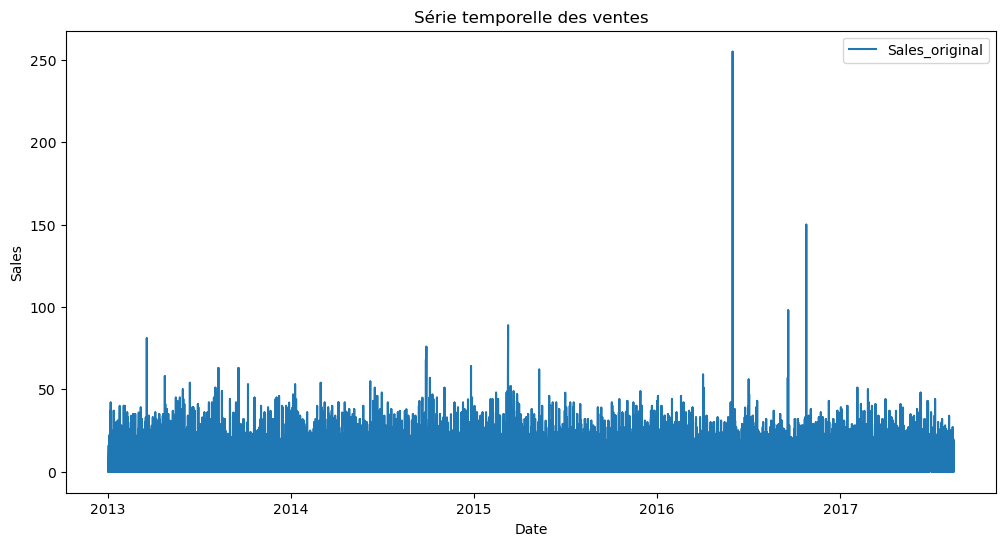

In [56]:
# Trier le DataFrame par date
train_data_unique = train_data_unique.sort_values('date')

# Tracer la série temporelle de la variable cible 'sales'
plt.figure(figsize=(12, 6))
plt.plot(train_data_unique['date'], train_data_unique['sales_original'], label='Sales_original')
plt.title('Série temporelle des ventes')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

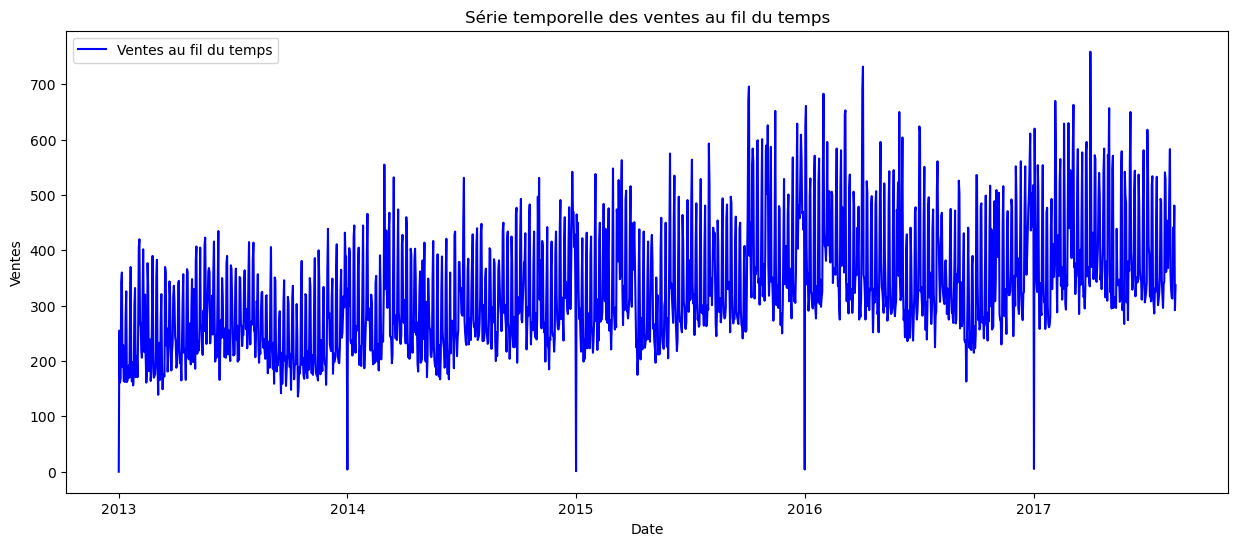

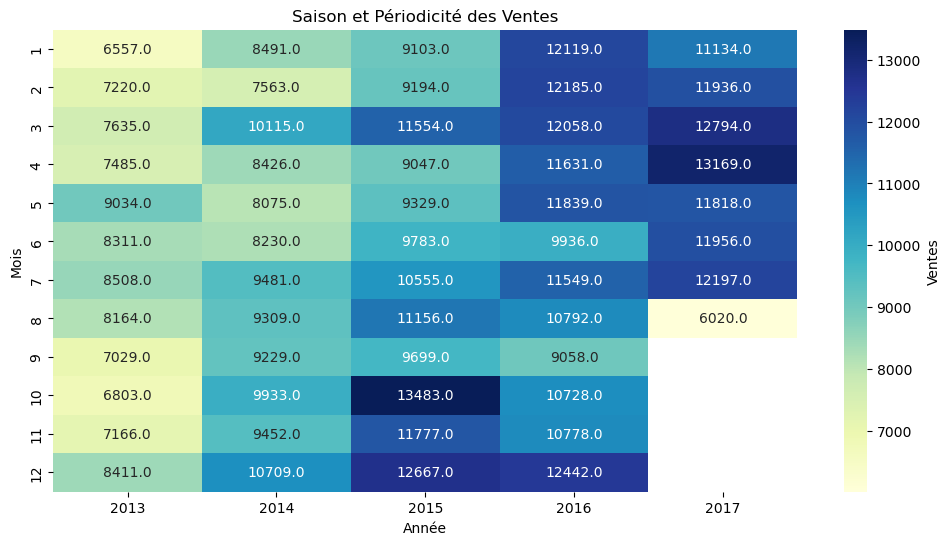

In [57]:
# Créer une série temporelle des ventes
sales_time_series = train_data_unique.groupby('date')['sales_original'].sum()

# Tracer la série temporelle des ventes
plt.figure(figsize=(15, 6))
plt.plot(sales_time_series, label='Ventes au fil du temps', color='blue')
plt.title('Série temporelle des ventes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

# Explorer la saisonnalité avec un heatmap
sales_seasonality = train_data_unique.pivot_table(index=train_data_unique['date'].dt.month, columns=train_data_unique['date'].dt.year, values='sales_original', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(sales_seasonality, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Ventes'})
plt.title('Saison et Périodicité des Ventes')
plt.xlabel('Année')
plt.ylabel('Mois')
plt.show()

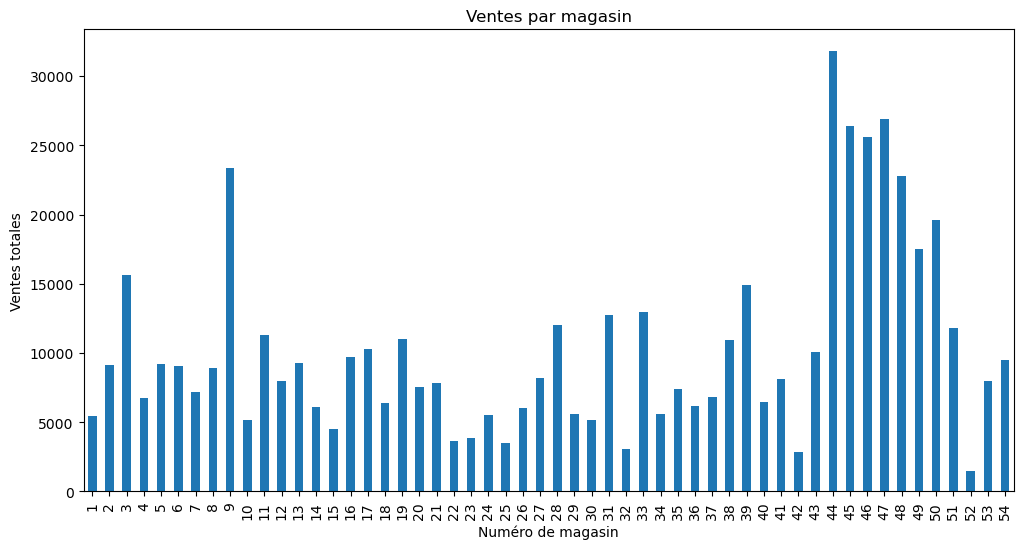

In [58]:
# Calculer les ventes totales par magasin :
sales_by_store = train_data_unique.groupby('store_nbr')['sales_original'].sum()

#Visualiser les ventes par magasin :
plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar')
plt.title('Ventes par magasin')
plt.xlabel('Numéro de magasin')
plt.ylabel('Ventes totales')
plt.show()

In [59]:
# Identifier les magasins les plus performants et les moins performants :
top_stores = sales_by_store.sort_values(ascending=False).head(5)
bottom_stores = sales_by_store.sort_values().head(5)

print("Magasins les plus performants :\n", top_stores)
print("\nMagasins les moins performants :\n", bottom_stores)

Magasins les plus performants :
 store_nbr
44    31780.0
47    26930.0
45    26403.0
46    25580.0
9     23358.0
Name: sales_original, dtype: float64

Magasins les moins performants :
 store_nbr
52    1497.0
42    2826.0
32    3099.0
25    3487.0
22    3677.0
Name: sales_original, dtype: float64


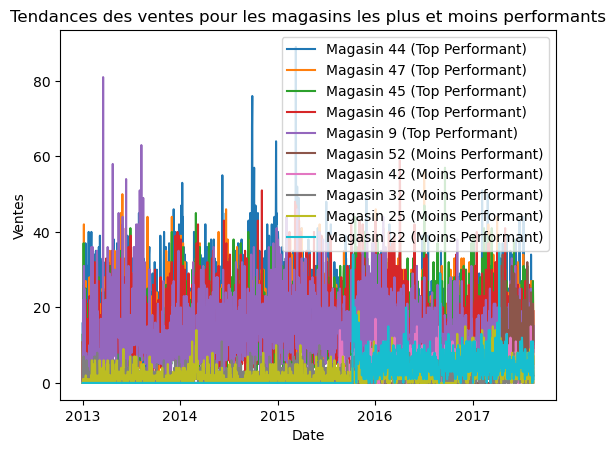

In [60]:
# Magasins les plus performants
for store_nbr in top_stores.index:
    store_data = train_data_unique[train_data_unique['store_nbr'] == store_nbr]
    plt.plot(store_data['date'], store_data['sales_original'], label=f'Magasin {store_nbr} (Top Performant)')

# Magasins les moins performants
for store_nbr in bottom_stores.index:
    store_data = train_data_unique[train_data_unique['store_nbr'] == store_nbr]
    plt.plot(store_data['date'], store_data['sales_original'], label=f'Magasin {store_nbr} (Moins Performant)')

plt.title('Tendances des ventes pour les magasins les plus et moins performants')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

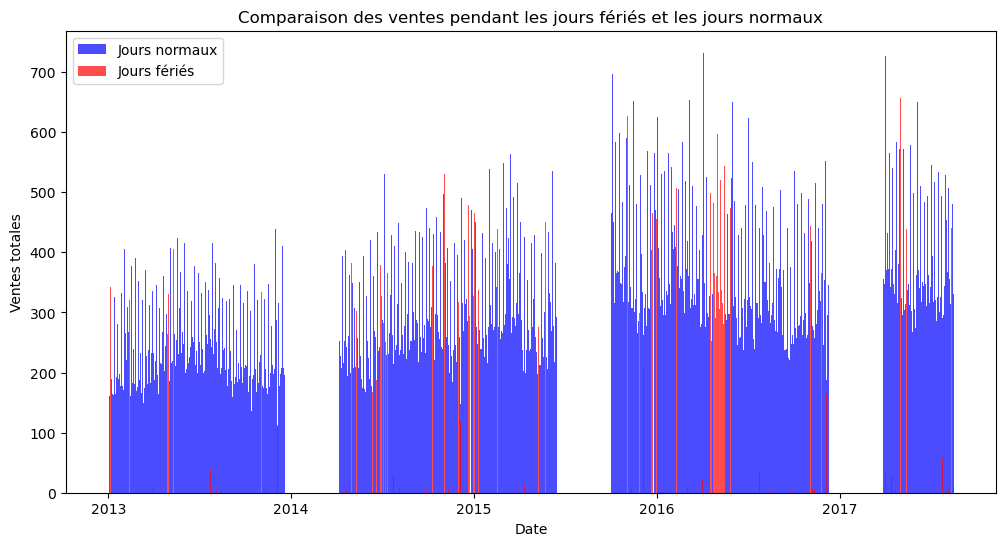

In [61]:
# Créer un masque pour les jours fériés
holiday_mask = (train_data_unique['holiday_national'] == 1) | (train_data_unique['holiday_regional'] == 1) | (train_data_unique['holiday_local'] == 1)

# Créer deux séries de données : une pour les ventes pendant les jours fériés et une pour les ventes pendant les jours normaux
sales_holidays = train_data_unique[holiday_mask].groupby('date')['sales_original'].sum().reset_index()
sales_normal = train_data_unique[~holiday_mask].groupby('date')['sales_original'].sum().reset_index()

# Créer un graphique pour comparer les ventes pendant les jours fériés et les jours normaux
plt.figure(figsize=(12, 6))
plt.bar(sales_normal['date'], sales_normal['sales_original'], label='Jours normaux', color='blue', alpha=0.7)
plt.bar(sales_holidays['date'], sales_holidays['sales_original'], label='Jours fériés', color='red', alpha=0.7)

plt.title('Comparaison des ventes pendant les jours fériés et les jours normaux')
plt.xlabel('Date')
plt.ylabel('Ventes totales')
plt.legend()
plt.show()

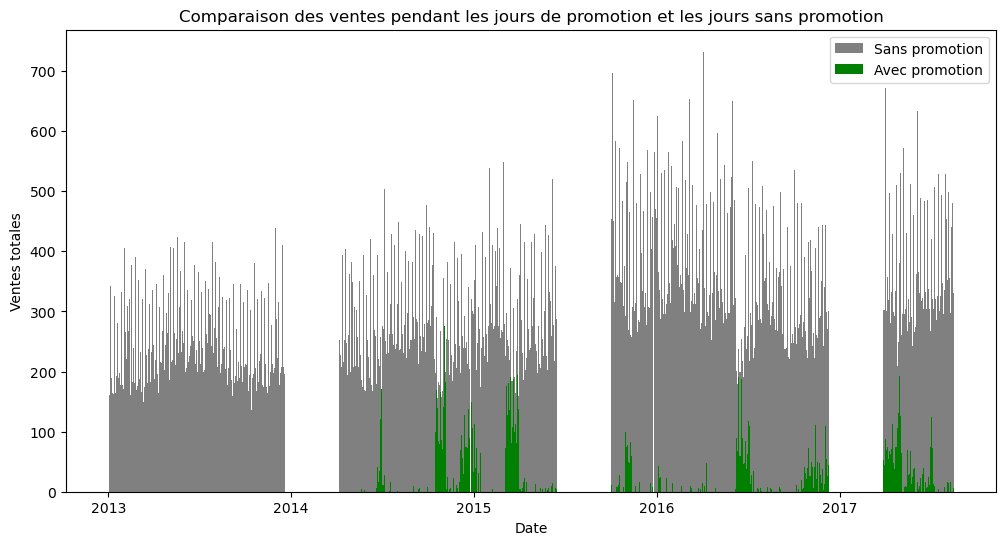

In [62]:
# Créer un masque pour les jours de promotion
promotion_mask = train_data_unique['onpromotion'] == 1

# Créer deux séries de données : une pour les ventes pendant les jours de promotion et une pour les ventes pendant les jours sans promotion
sales_promotion = train_data_unique[promotion_mask].groupby('date')['sales_original'].sum().reset_index()
sales_no_promotion = train_data_unique[~promotion_mask].groupby('date')['sales_original'].sum().reset_index()

# Créer des diagrammes en barres pour comparer les ventes pendant les jours de promotion et les jours sans promotion
plt.figure(figsize=(12, 6))

plt.bar(sales_no_promotion['date'], sales_no_promotion['sales_original'], color='grey', label='Sans promotion')
plt.bar(sales_promotion['date'], sales_promotion['sales_original'], color='green', label='Avec promotion')

plt.title('Comparaison des ventes pendant les jours de promotion et les jours sans promotion')
plt.xlabel('Date')
plt.ylabel('Ventes totales')
plt.legend()
plt.show()

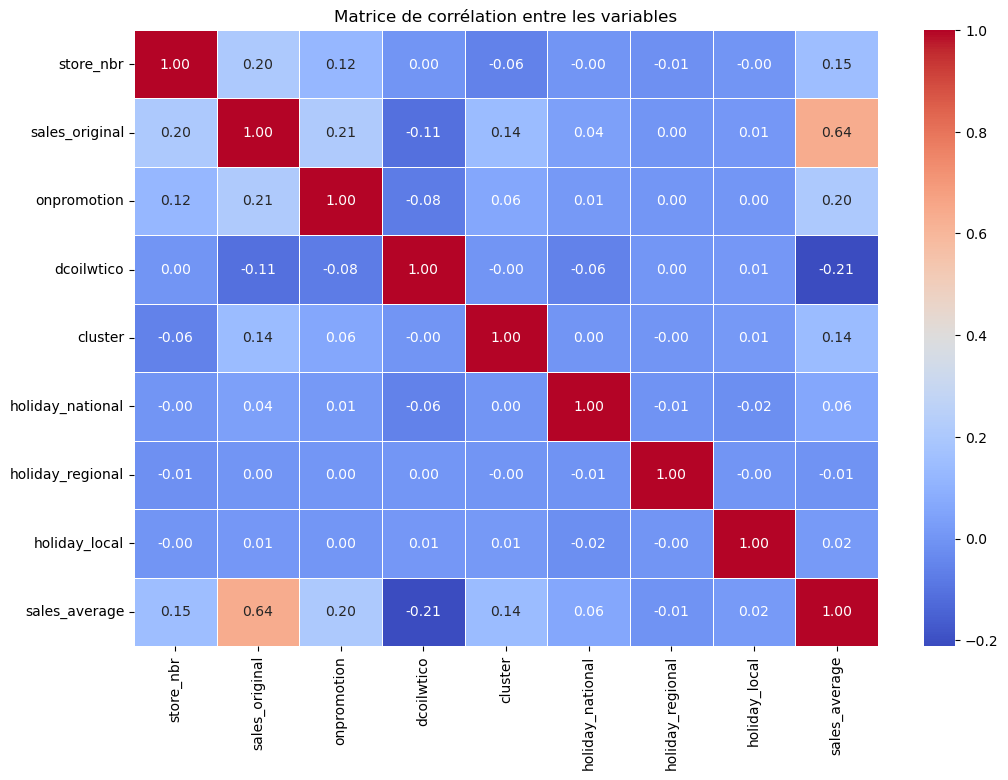

In [64]:
# Calculer la matrice de corrélation
correlation_matrix = train_data_unique.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de corrélation entre les variables')
plt.show()